In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
from pathlib import Path

In [2]:
def get_df_from_path(hdf5filePath):
    h = h5py.File(hdf5filePath, 'r+')
    history = h['history']
    colnames = history.attrs['column_names']
    assert len(history) == len(colnames)
    nbcols = len(colnames)
    _ = dict()
    for i, colname in zip(range(nbcols), colnames):
        _[colname] = history[i]
    return pd.DataFrame(_)
def get_info_from_path(hdf5filePath):
    #'HDF5Files/toyRates_logM-0.1_X0.6.hdf5' is a filepath, get logM and X from it
    logM = float(hdf5filePath.split('logM')[1].split('_')[0])
    X = float(hdf5filePath.split('X')[1].split('_')[0])
    return logM, X
def get_µ_from_X(X): return 4 / ( 3 + 5*X )

In [3]:
p = Path('.')
_ = list(p.glob('Histories/*.hdf5'))
paths = [str(hdf5file) for hdf5file in _]
data = {path : get_df_from_path(path) for path in paths}
print(f" {len(data)} history files found")

 69 history files found


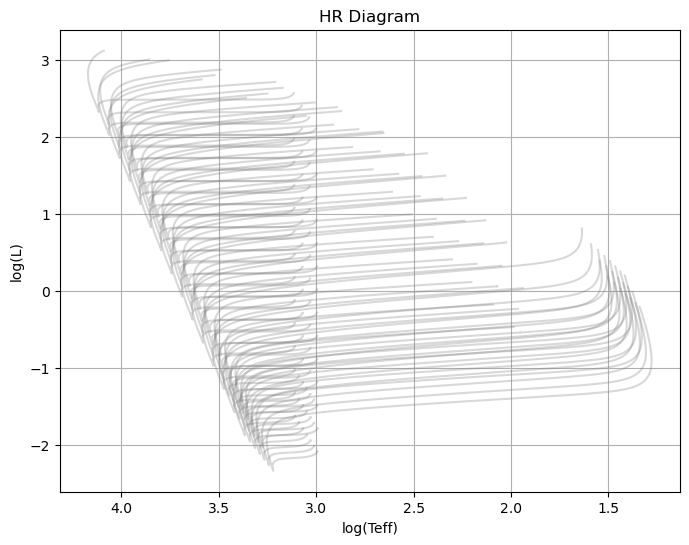

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for path in paths:
    logM, X = get_info_from_path(path)
    M = round(10**logM,1)
    history = data[path]
    ax.plot(np.log10(history.T_surf), np.log10(history.L_surf), label=f'M={M}, X={X}',color='gray',alpha=0.3)
    #plot mass
    #ax.plot(data[path].model_number,data[path].star_mass)
ax.set_xlabel('log(Teff)')
ax.set_ylabel('log(L)')
ax.set_title('HR Diagram')
ax.invert_xaxis()
ax.grid()
#ax.set_ylim(0.8,1)

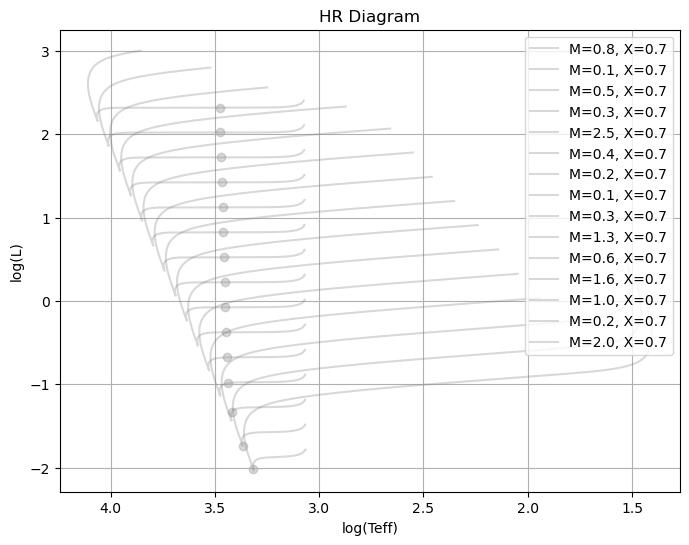

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for path in paths:
    logM, X = get_info_from_path(path)
    if X != 0.7:
        continue
    M = round(10**logM,1)
    history = data[path]
    modelnr = 200
    ax.plot(np.log10(history.T_surf), np.log10(history.L_surf), label=f'M={M}, X={X}',color='gray',alpha=0.3)
    ax.scatter(np.log10(history.T_surf)[modelnr], np.log10(history.L_surf)[modelnr], color='gray',alpha=0.3)
    #plot mass
    #ax.plot(data[path].model_number,data[path].star_mass)
ax.set_xlabel('log(Teff)')
ax.set_ylabel('log(L)')
ax.set_title('HR Diagram')
ax.invert_xaxis()
ax.grid()
ax.legend()
#ax.set_ylim(0.8,1)


In [6]:
dict_logL = dict()
for path in paths:
    history = data[path]
    logM, X = get_info_from_path(path)
    modelnr=200
    try:
        L = history.L_surf[modelnr]
        dict_logL[path] = np.log10(L)
    except:
        continue

all_logL = np.array(list(dict_logL.values()))

NameError: name 'allL' is not defined

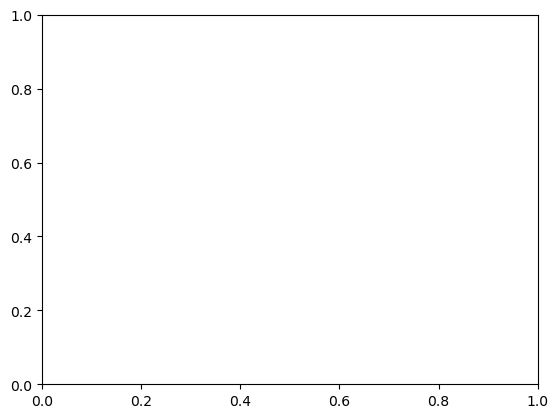

In [7]:
fig, ax = plt.subplots(1,1)
#imshow
#make cmap
cmap = plt.cm.viridis
#normalize
norm = plt.Normalize(allL.min(), allL.max())
for path, logL in dict_logL.items():
    logM, X = get_info_from_path(path)
    µ = get_µ_from_X(X)
    M = 10**logM
    #now plot logM, µ, L with L on colorscale
    ax.scatter(M, µ, color=cmap(logL))
    ax.text(M, µ, f'{np.round(logL,1)}', fontsize=8)
ax.set_xlabel('Mass $M$')
ax.set_ylabel('Molecular Weight $\mu$')
ax.set_title('logL')
ax.semilogx()

In [ ]:
dict_logL_ZAMS = dict()
for path in paths:
    history = data[path]
    logM, X = get_info_from_path(path)
    try:
        modelnr = np.where(history.X_center < history.X_center[0]*0.99)[0][0]
        L = history.L_surf[modelnr]
        dict_logL_ZAMS[path] = np.log10(L)
    except:
        continue
all_logL_ZAMS = np.array(list(dict_logL_ZAMS.values()))

[]

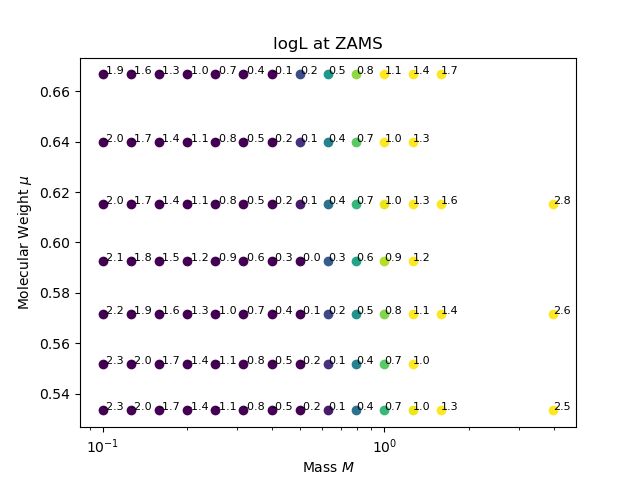

In [ ]:
fig, ax = plt.subplots(1,1)
cmap = plt.cm.viridis
#normalize
norm = plt.Normalize(all_logL_ZAMS.min(), all_logL_ZAMS.max())
for path, logL in dict_logL_ZAMS.items():
    logM, X = get_info_from_path(path)
    µ = get_µ_from_X(X)
    M = 10**logM
    #now plot logM, µ, L with L on colorscale
    ax.scatter(M, µ, color=cmap(logL))
    ax.text(M, µ, f'{np.round(logL,1)}', fontsize=8)
ax.set_xlabel('Mass $M$')
ax.set_ylabel('Molecular Weight $\mu$')
ax.set_title('logL at ZAMS')
ax.semilogx()

Text(0.5, 1.0, 'logL at fixed X = 0.7')

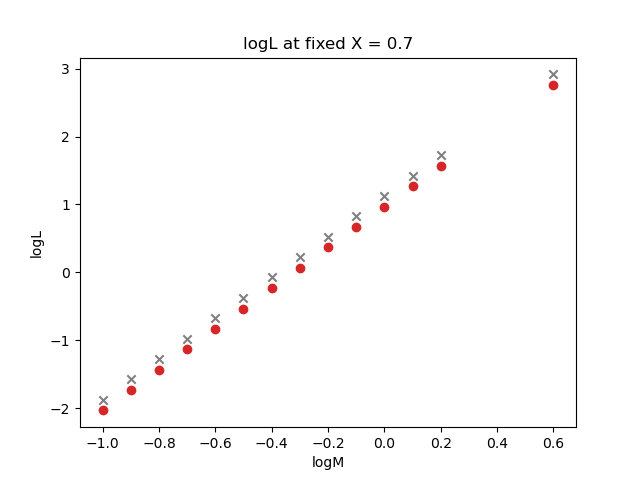

In [ ]:
fig, ax = plt.subplots(1,1)
for path, logL in dict_logL_ZAMS.items():
    history = data[path]
    logM, X = get_info_from_path(path)
    modelnr = 200
    if X != 0.7:
        continue
    ax.scatter(logM, logL, color='tab:red')
for path, logL in dict_logL.items():
    history = data[path]
    logM, X = get_info_from_path(path)
    modelnr = 200
    if X != 0.7:
        continue
    ax.scatter(logM, logL, color='gray',marker='x')

ax.set_xlabel('logM')
ax.set_ylabel('logL')
ax.set_title('logL at fixed X = 0.7')